In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
train_df = pd.read_csv("cardio_train.csv", sep=";")
train_df = train_df.drop(columns=["id"])

In [150]:
train_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [151]:
train_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
train_df["age"] = train_df["age"] // 365

In [153]:
train_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [155]:
train_df["height"] = train_df["height"] / 100

In [156]:
# train_df["BMI"] = train_df["weight"] / (train_df["height"]  ** 2)

In [157]:
print(train_df.head())
train_df.info()
train_df.describe() 

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2    1.68    62.0    110     80            1     1      0     0   
1   55       1    1.56    85.0    140     90            3     1      0     0   
2   51       1    1.65    64.0    130     70            3     1      0     0   
3   48       2    1.69    82.0    150    100            1     1      0     0   
4   47       1    1.56    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  float64
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int6

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Missing Values

In [158]:
train_df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## Find The Outliers


1: age 
The inlier shape of age: 69996
The Range of age : (np.float64(33.0), np.float64(73.0))
The outlier shape of age : 4



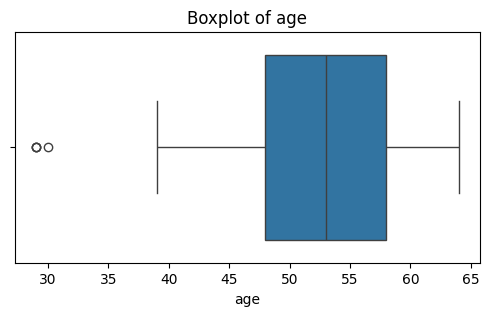

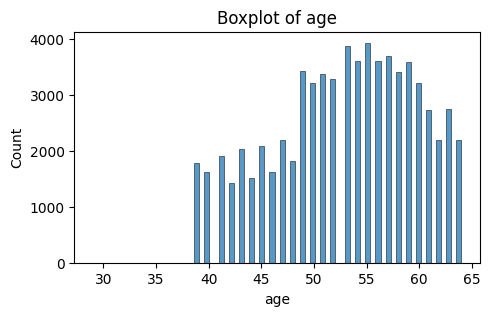


2: gender 
The inlier shape of gender: 70000
The Range of gender : (np.float64(-0.5), np.float64(3.5))
The outlier shape of gender : 0



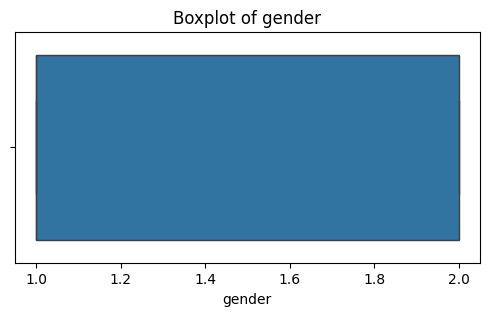

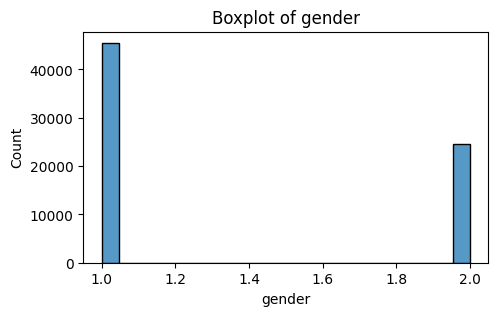


3: height 
The inlier shape of height: 69481
The Range of height : (np.float64(1.4250000000000003), np.float64(1.8649999999999998))
The outlier shape of height : 519



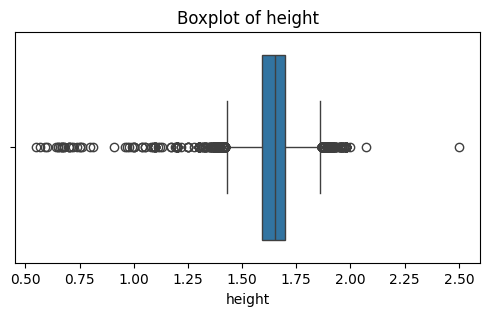

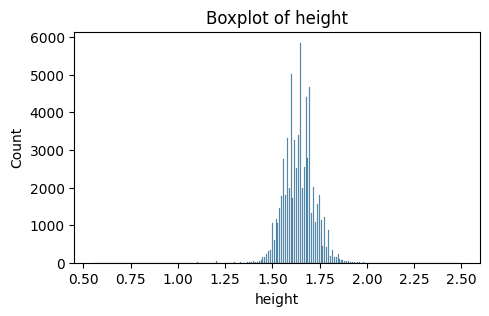


4: weight 
The inlier shape of weight: 68181
The Range of weight : (np.float64(39.5), np.float64(107.5))
The outlier shape of weight : 1819



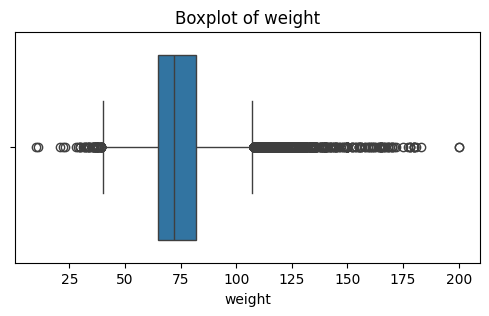

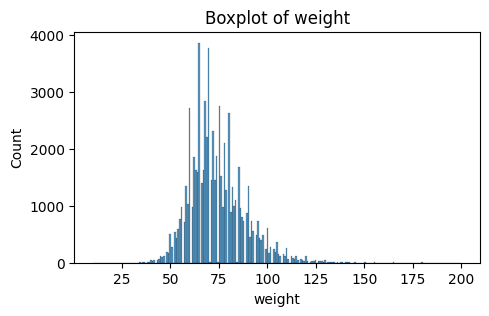


5: ap_hi 
The inlier shape of ap_hi: 68565
The Range of ap_hi : (np.float64(90.0), np.float64(170.0))
The outlier shape of ap_hi : 1435



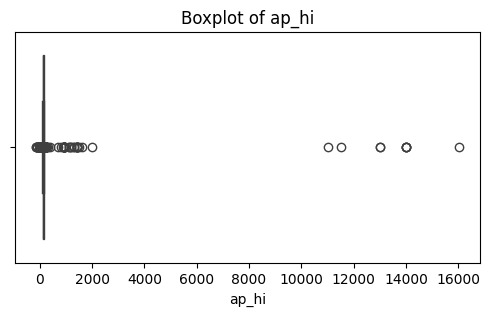

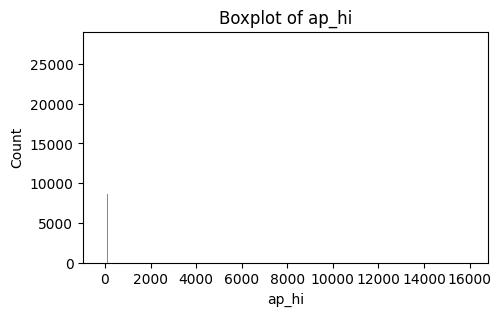


6: ap_lo 
The inlier shape of ap_lo: 65368
The Range of ap_lo : (np.float64(65.0), np.float64(105.0))
The outlier shape of ap_lo : 4632



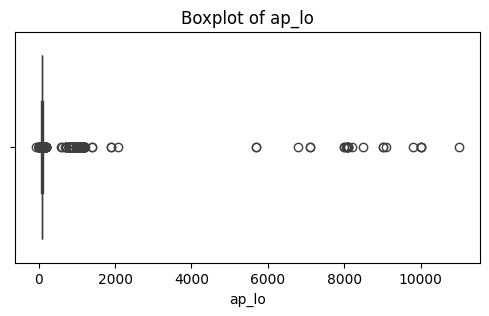

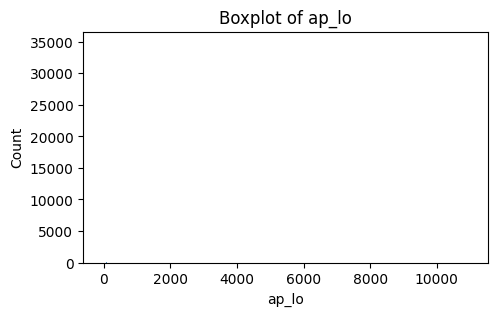


7: cholesterol 
The inlier shape of cholesterol: 70000
The Range of cholesterol : (np.float64(-0.5), np.float64(3.5))
The outlier shape of cholesterol : 0



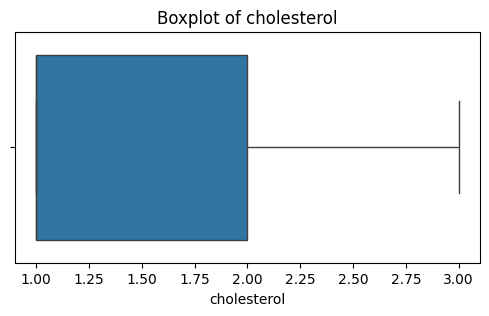

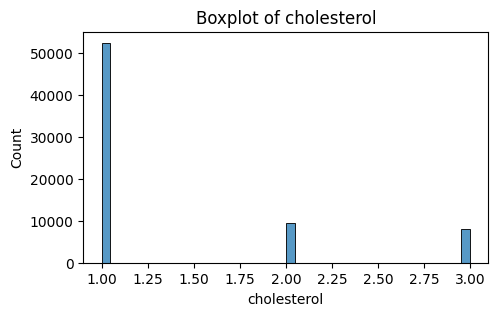


8: gluc 
The inlier shape of gluc: 59479
The Range of gluc : (np.float64(1.0), np.float64(1.0))
The outlier shape of gluc : 10521



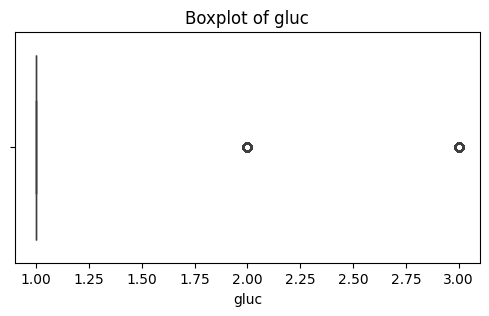

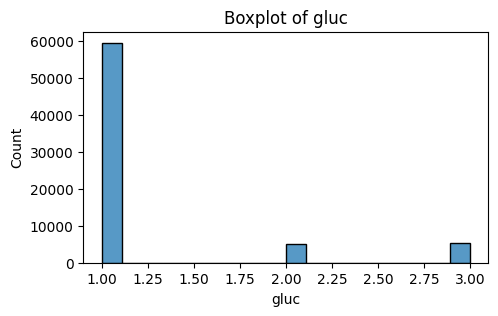


9: smoke 
The inlier shape of smoke: 63831
The Range of smoke : (np.float64(0.0), np.float64(0.0))
The outlier shape of smoke : 6169



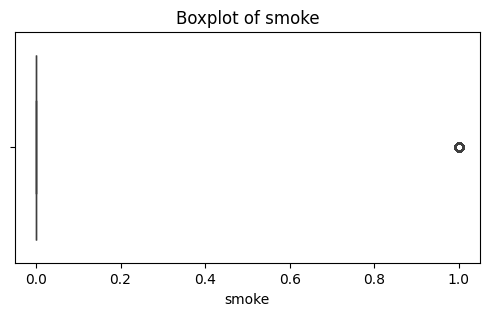

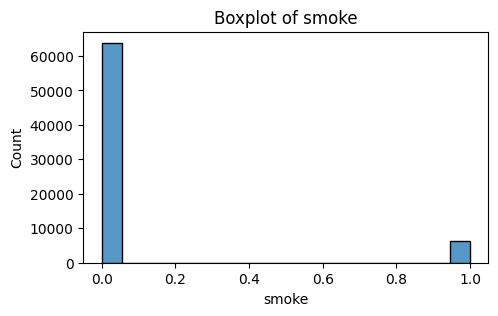


10: alco 
The inlier shape of alco: 66236
The Range of alco : (np.float64(0.0), np.float64(0.0))
The outlier shape of alco : 3764



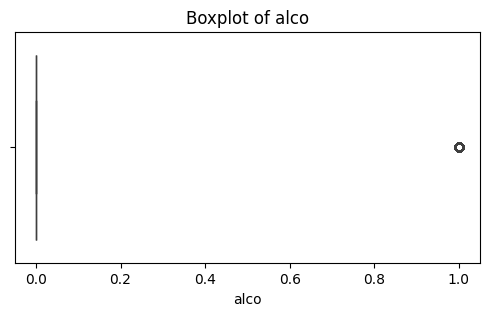

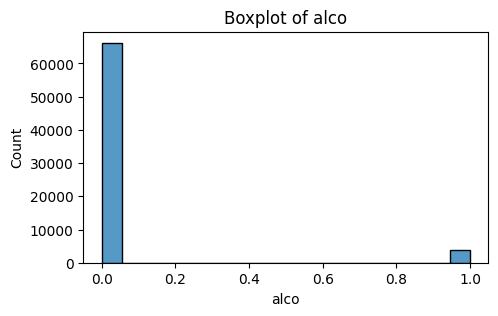


11: active 
The inlier shape of active: 56261
The Range of active : (np.float64(1.0), np.float64(1.0))
The outlier shape of active : 13739



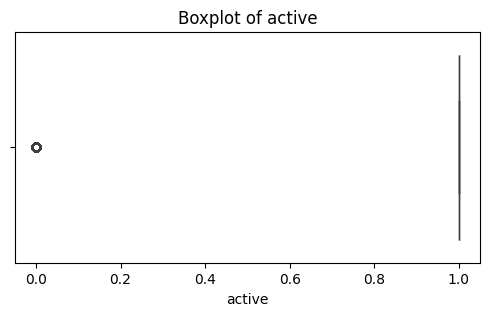

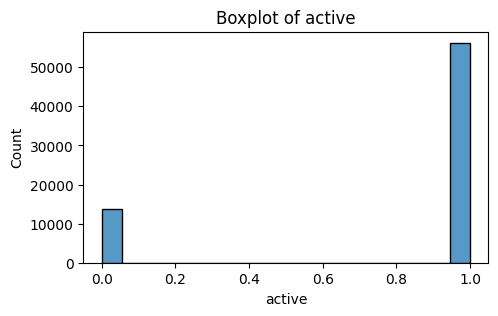


12: cardio 
The inlier shape of cardio: 70000
The Range of cardio : (np.float64(-1.5), np.float64(2.5))
The outlier shape of cardio : 0



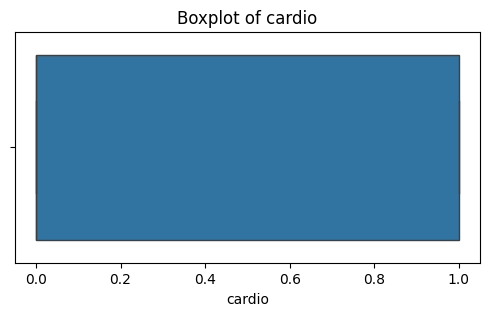

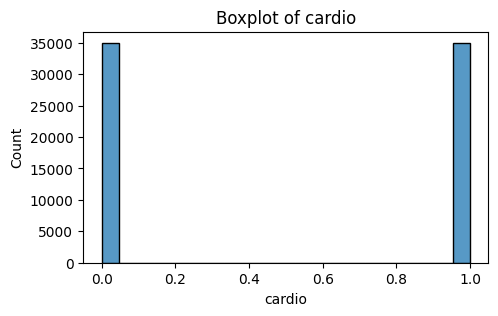

In [159]:
for i, col in enumerate(train_df.columns):
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    inliers = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
    # train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
    print("")
    print(f"{i+1}: {col} ")
    print(f"The inlier shape of {col}: {inliers.shape[0]}")
    print(f"The Range of {col} : {lower_bound, upper_bound}")
    print(f"The outlier shape of {col} : {outliers.shape[0]}")
    print("")
    ## Visulation the handilling
    plt.figure(figsize=(6,3))
    sns.boxplot(x=train_df[col], data= train_df)
    plt.title(f"Boxplot of {col}")
    plt.show()

    plt.figure(figsize=(5.23,3))
    sns.histplot(x=train_df[col], data= train_df)
    plt.title(f"Boxplot of {col}")
    plt.show()
    
    print("="*50)
  

## Handling Outliers

In [160]:
train_df = train_df[
    (train_df["age"] >= 33) &
    (train_df["age"] <= 73)
]


In [161]:
train_df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [162]:
import pandas as pd

cols = ['height', 'weight', 'ap_hi', 'ap_lo']

mask_outliers = pd.Series(False, index=train_df.index)

for col in cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask_col = (train_df[col] < lower) | (train_df[col] > upper)

    print(f"{col} outliers:", mask_col.sum())

    mask_outliers |= mask_col   # OR → outlier في أي عمود

# حذف الصفوف
train_df = train_df[~mask_outliers]

print("Shape after removing outliers:", train_df.shape)


height outliers: 519
weight outliers: 1819
ap_hi outliers: 1435
ap_lo outliers: 4631
Shape after removing outliers: (62502, 12)



1: age 
The inlier shape of age: 62502
The Range of age : (np.float64(33.0), np.float64(73.0))
The outlier shape of age : 0



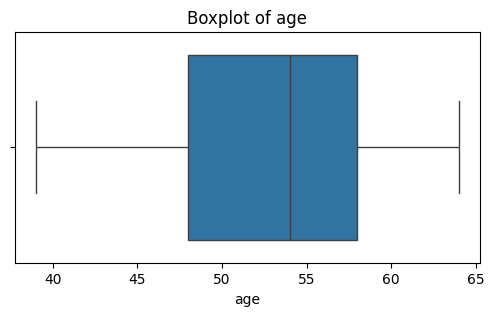

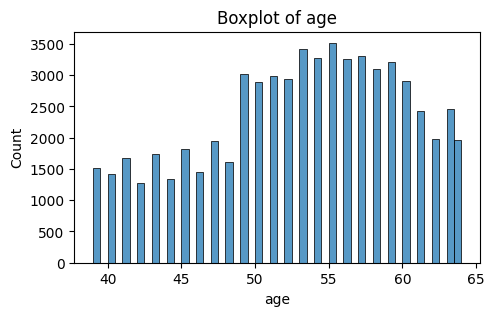


2: gender 
The inlier shape of gender: 62502
The Range of gender : (np.float64(-0.5), np.float64(3.5))
The outlier shape of gender : 0



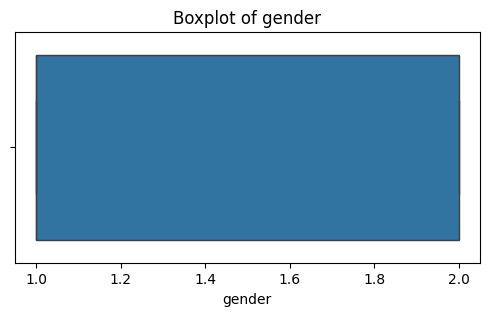

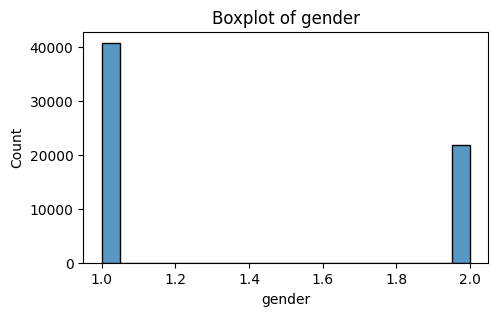


3: height 
The inlier shape of height: 62502
The Range of height : (np.float64(1.4250000000000003), np.float64(1.8649999999999998))
The outlier shape of height : 0



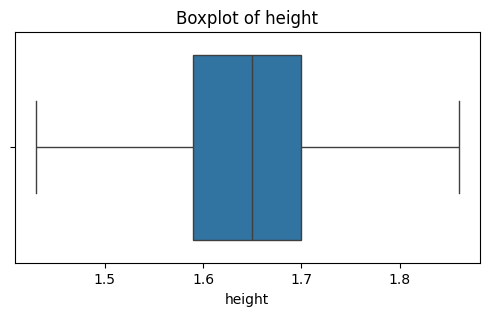

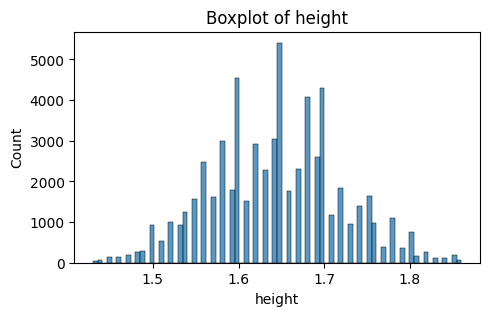


4: weight 
The inlier shape of weight: 62239
The Range of weight : (np.float64(41.0), np.float64(105.0))
The outlier shape of weight : 263



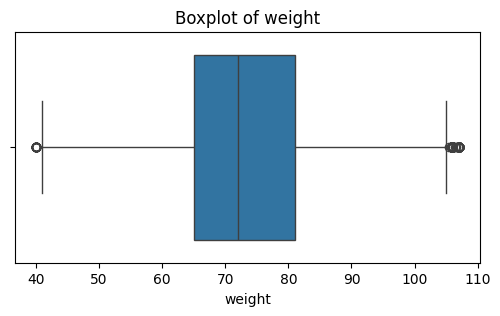

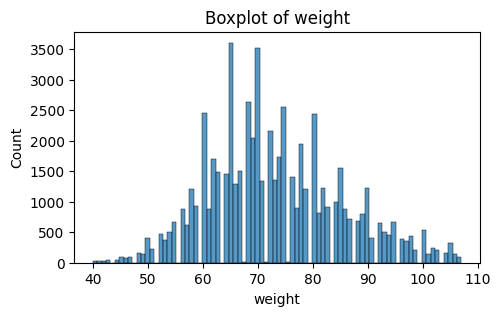


5: ap_hi 
The inlier shape of ap_hi: 62502
The Range of ap_hi : (np.float64(90.0), np.float64(170.0))
The outlier shape of ap_hi : 0



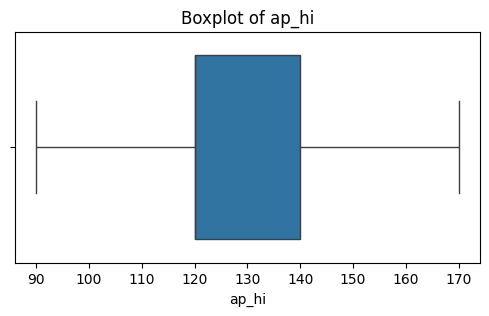

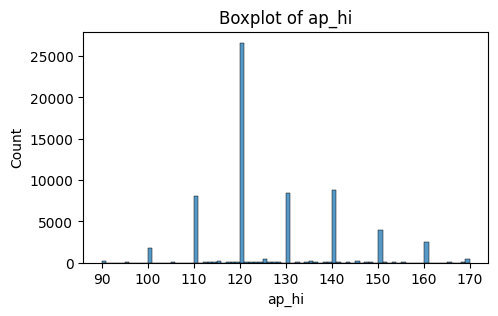


6: ap_lo 
The inlier shape of ap_lo: 62502
The Range of ap_lo : (np.float64(65.0), np.float64(105.0))
The outlier shape of ap_lo : 0



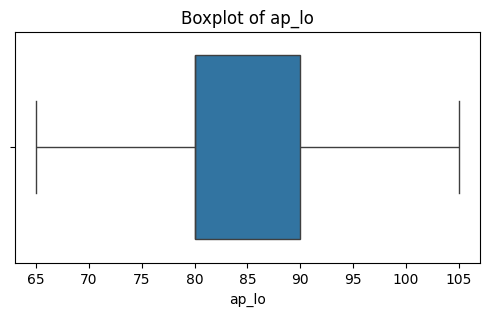

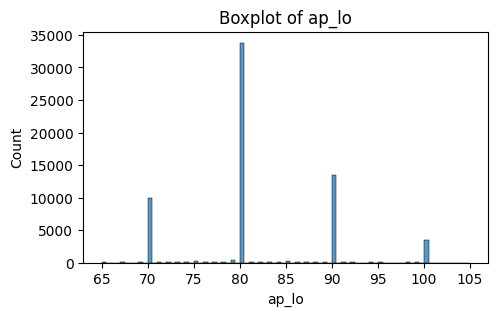


7: cholesterol 
The inlier shape of cholesterol: 47211
The Range of cholesterol : (np.float64(1.0), np.float64(1.0))
The outlier shape of cholesterol : 15291



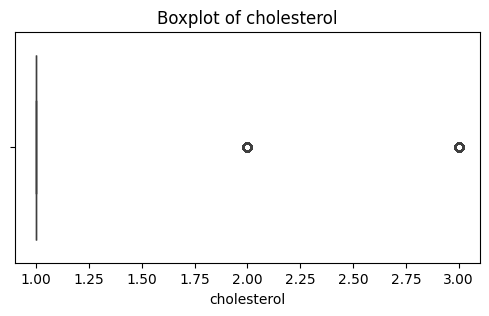

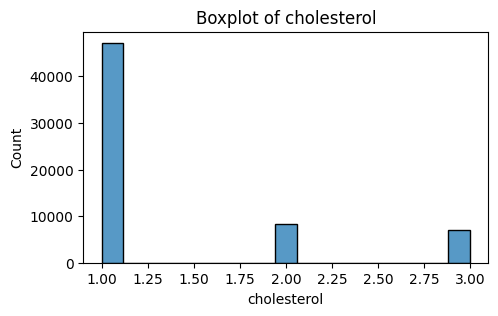


8: gluc 
The inlier shape of gluc: 53405
The Range of gluc : (np.float64(1.0), np.float64(1.0))
The outlier shape of gluc : 9097



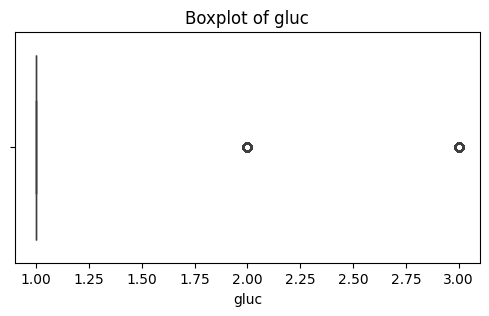

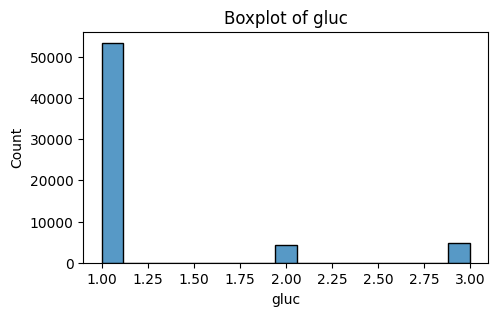


9: smoke 
The inlier shape of smoke: 57105
The Range of smoke : (np.float64(0.0), np.float64(0.0))
The outlier shape of smoke : 5397



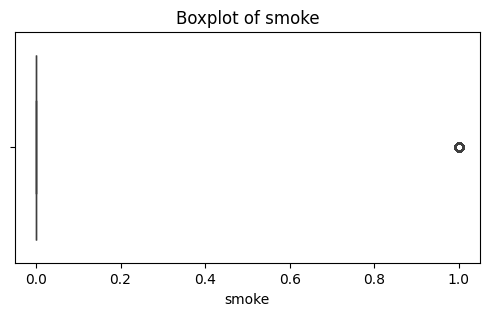

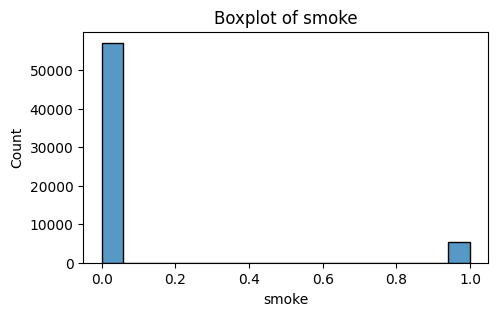


10: alco 
The inlier shape of alco: 59241
The Range of alco : (np.float64(0.0), np.float64(0.0))
The outlier shape of alco : 3261



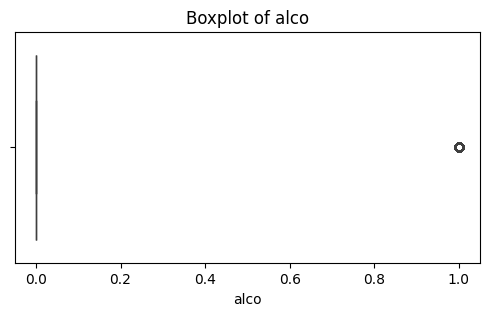

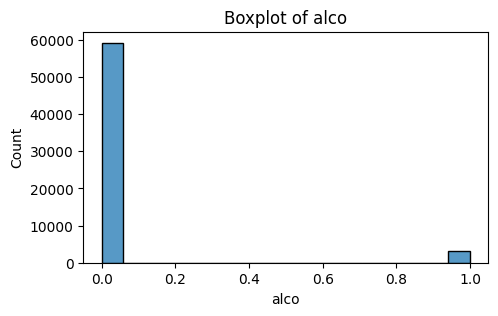


11: active 
The inlier shape of active: 50271
The Range of active : (np.float64(1.0), np.float64(1.0))
The outlier shape of active : 12231



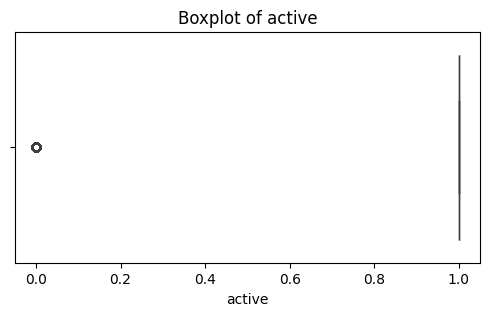

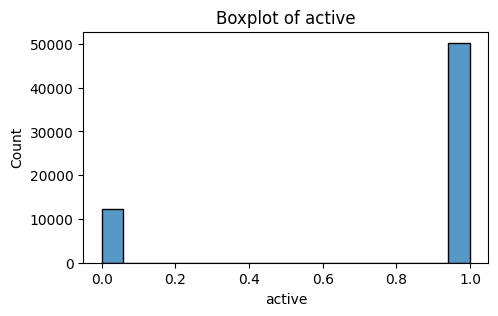


12: cardio 
The inlier shape of cardio: 62502
The Range of cardio : (np.float64(-1.5), np.float64(2.5))
The outlier shape of cardio : 0



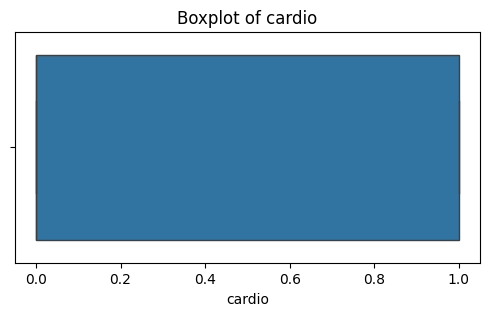

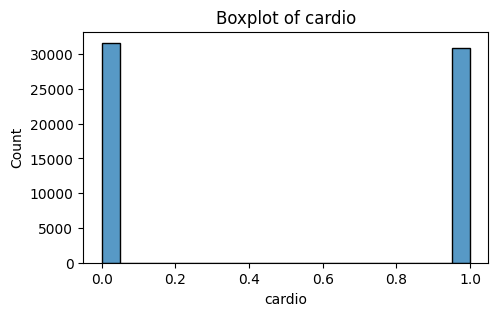

In [163]:
for i, col in enumerate(train_df.columns):
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    inliers = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
    # train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
    print("")
    print(f"{i+1}: {col} ")
    print(f"The inlier shape of {col}: {inliers.shape[0]}")
    print(f"The Range of {col} : {lower_bound, upper_bound}")
    print(f"The outlier shape of {col} : {outliers.shape[0]}")
    print("")
    ## Visulation the handilling
    plt.figure(figsize=(6,3))
    sns.boxplot(x=train_df[col], data= train_df)
    plt.title(f"Boxplot of {col}")
    plt.show()

    plt.figure(figsize=(5.23,3))
    sns.histplot(x=train_df[col], data= train_df)
    plt.title(f"Boxplot of {col}")
    plt.show()
    
    print("="*50)
  

In [164]:
# Q1 = train_df["height"].quantile(0.25)
# Q3 = train_df["height"].quantile(0.75)

# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# mode_H = train_df.loc[train_df["height"] >= 1, "height"].mode()[0]

# outliers_mask = (train_df["height"] < lower_bound) | (train_df["height"] > upper_bound)
# mask = train_df["height"] < 1
# train_df.loc[mask, "height"] = mode_H

# outliers = train_df[outliers_mask]
# inliers = train_df[~outliers_mask]

# print(f"The inlier shape: {inliers.shape[0]}")
# print(f"The Range of height: ({lower_bound}, {upper_bound})")
# print(f"The outlier shape: {outliers.shape[0]}")
# print(f"Mode of height: {mode_H}")


The inlier shape of : 62502
The Range of  : (np.float64(1.4250000000000003), np.float64(1.8649999999999998))
The outlier shape of  0



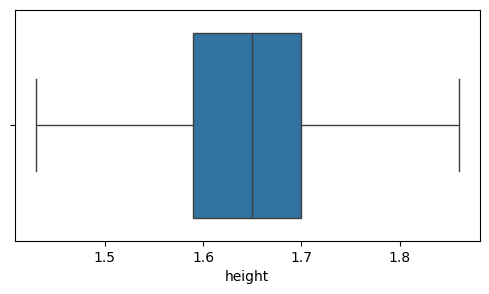

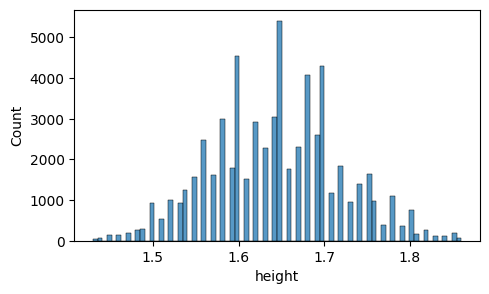

In [165]:

Q1 = train_df["height"].quantile(0.25)
Q3 = train_df["height"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train_df[(train_df["height"] < lower_bound) | (train_df["height"] > upper_bound)]
inliers = train_df[(train_df["height"] >= lower_bound) & (train_df["height"] <= upper_bound)]
# train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]

print(f"The inlier shape of : {inliers.shape[0]}")
print(f"The Range of  : {lower_bound, upper_bound}")
print(f"The outlier shape of  {outliers.shape[0]}")
print("")
## Visulation the handilling
plt.figure(figsize=(6,3))
sns.boxplot(x=train_df["height"], data= train_df)

plt.show()

plt.figure(figsize=(5.23,3))
sns.histplot(x=train_df["height"], data= train_df)

plt.show()

print("="*50)

In [166]:
# Q1 = train_df[""].quantile(0.25)
# Q3 = train_df["height"].quantile(0.75)

# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# mode_H = train_df.loc[train_df["height"] >= 1, "height"].mode()[0]

# outliers_mask = (train_df["height"] < lower_bound) | (train_df["height"] > upper_bound)
# mask = train_df["height"] < 1
# train_df.loc[mask, "height"] = mode_H

# outliers = train_df[outliers_mask]
# inliers = train_df[~outliers_mask]

# print(f"The inlier shape: {inliers.shape[0]}")
# print(f"The Range of height: ({lower_bound}, {upper_bound})")
# print(f"The outlier shape: {outliers.shape[0]}")
# print(f"Mode of height: {mode_H}")


In [167]:
# lower_bound = 40
# upper_bound = 120 

# mask_outlier = (train_df["ap_lo"] < lower_bound) | (train_df["ap_lo"] > upper_bound)
# outliers = train_df[mask_outlier]

# print("Number of outliers:", outliers.shape[0])
# print("Outlier values min/max:", outliers["ap_lo"].min(), outliers["ap_lo"].max())


In [168]:
train_df.shape

(62502, 12)

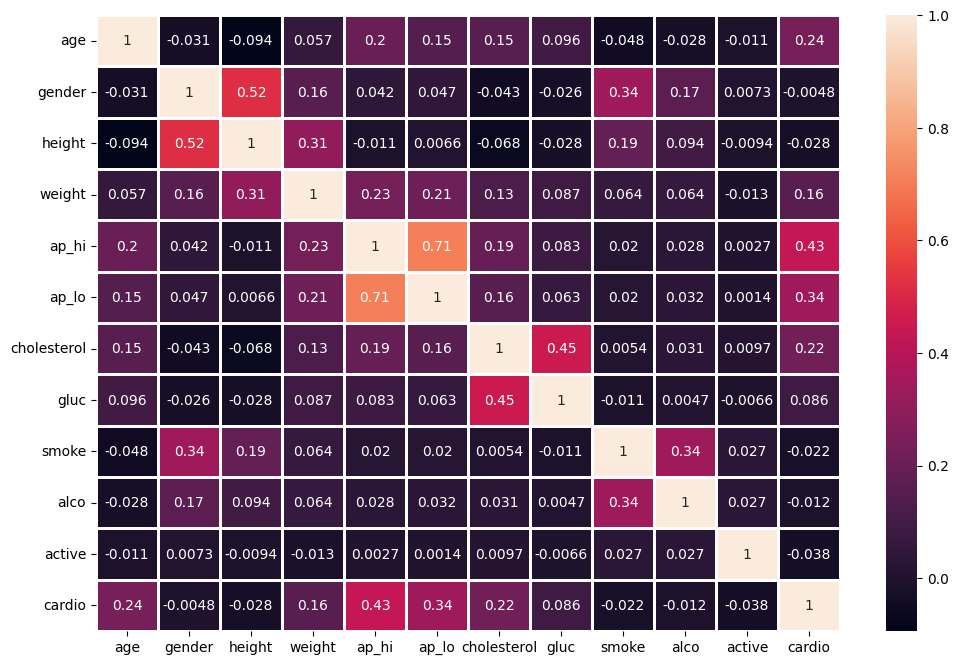

In [169]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), linewidths=1, annot= True)
plt.show()

In [170]:
train_df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.030986,-0.094103,0.057354,0.204772,0.147877,0.153895,0.096090,-0.047834,-0.028355,-0.010670,0.236329
gender,-0.030986,1.000000,0.517276,0.157696,0.042239,0.047299,-0.043390,-0.025926,0.337061,0.168993,0.007320,-0.004814
height,-0.094103,0.517276,1.000000,0.305802,-0.010803,0.006614,-0.068191,-0.028393,0.192065,0.094084,-0.009358,-0.027595
weight,0.057354,0.157696,0.305802,1.000000,0.233134,0.214544,0.125385,0.086768,0.063814,0.063659,-0.013115,0.161721
ap_hi,0.204772,0.042239,-0.010803,0.233134,1.000000,0.705629,0.192533,0.082808,0.019992,0.027612,0.002741,0.432215
ap_lo,0.147877,0.047299,0.006614,0.214544,0.705629,1.000000,0.155793,0.063126,0.020189,0.031674,0.001399,0.336278
cholesterol,0.153895,-0.043390,-0.068191,0.125385,0.192533,0.155793,1.000000,0.450073,0.005433,0.030847,0.009690,0.218223
gluc,0.096090,-0.025926,-0.028393,0.086768,0.082808,0.063126,0.450073,1.000000,-0.010522,0.004749,-0.006625,0.085730
smoke,-0.047834,0.337061,0.192065,0.063814,0.019992,0.020189,0.005433,-0.010522,1.000000,0.341810,0.027300,-0.022171
alco,-0.028355,0.168993,0.094084,0.063659,0.027612,0.031674,0.030847,0.004749,0.341810,1.000000,0.026866,-0.012321


In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV

X = train_df.drop(columns=["cardio"])
y = train_df["cardio"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7176225901927846


In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



# List of Parameters hyperparameters 
param_grids = {
    "LogReg": {"C": [0.1, 1.0, 10.0], "max_iter": [500]},
    "RandomForest": {"n_estimators": [100, 200], "max_depth": [None, 5, 10]},
    "AdaBoost": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1, 0.5]},
    "GradientBoosting": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1], "max_depth": [1, 3, 5]},
    "XGBoost": {"n_estimators": [100,200], "learning_rate": [0.05,0.1], "max_depth": [3,5]},
    "LightGBM": {"n_estimators": [100,200], "learning_rate": [0.05,0.1], "max_depth": [-1,5]},
    "CatBoost": {"iterations": [100,200], "learning_rate": [0.05,0.1], "depth": [4,6]}
}

# The Models
base_models = {
    "LogReg": LogisticRegression(max_iter=500, random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, verbosity=0),
    "LightGBM": LGBMClassifier(random_state=42, verbosity=-1),
    "CatBoost": CatBoostClassifier(random_seed=42, verbose=0)
}

best_models = {}

# Train a models with GridSearchCV
for name, model in base_models.items():
    print(f"Training {name}...")
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print(f"Best params for {name}: {grid.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_model = model
    
    best_models[name] = best_model
    
    # validation
    val_preds = best_model.predict(X_test)
    acc = accuracy_score(y_test, val_preds)
    f1 = f1_score(y_test, val_preds)
    print(f"{name} => Validation Accuracy: {acc:.4f}, F1 Score: {f1:.4f}\n")

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[(name, mdl) for name, mdl in best_models.items()],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_jobs=-1
)
stacking_clf.fit(X_train, y_train)
stacking_preds = stacking_clf.predict(X_test)
stacking_acc = accuracy_score(y_test, stacking_preds)
stacking_f1 = f1_score(y_test, stacking_preds)
print(f"Stacking Classifier => Accuracy: {stacking_acc:.4f}, F1 Score: {stacking_f1:.4f}\n")

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[(name, mdl) for name, mdl in best_models.items()],
    voting='hard',
    n_jobs=-1
)
voting_clf.fit(X_train, y_train)
voting_preds = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, voting_preds)
voting_f1 = f1_score(y_test, voting_preds)
print(f"Voting Classifier => Accuracy: {voting_acc:.4f}, F1 Score: {voting_f1:.4f}\n")


Training LogReg...


c:\Users\omara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best params for LogReg: {'C': 10.0, 'max_iter': 500}
LogReg => Validation Accuracy: 0.7160, F1 Score: 0.6950

Training RandomForest...
Best params for RandomForest: {'max_depth': 10, 'n_estimators': 200}
RandomForest => Validation Accuracy: 0.7271, F1 Score: 0.7079

Training AdaBoost...
Best params for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 200}
AdaBoost => Validation Accuracy: 0.7179, F1 Score: 0.6893

Training GradientBoosting...
Best params for GradientBoosting: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
GradientBoosting => Validation Accuracy: 0.7256, F1 Score: 0.7100

Training XGBoost...
Best params for XGBoost: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
XGBoost => Validation Accuracy: 0.7250, F1 Score: 0.7096

Training LightGBM...
Best params for LightGBM: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
LightGBM => Validation Accuracy: 0.7249, F1 Score: 0.7100

Training CatBoost...
Best params for CatBoost: {'depth': 6, '